## <center> Twitter Sentiment Analysis </center>


### Problem Statement

Using NLP principles, develop a predictive sentiment analysis model that classifies posts or tweets as negative, positive, or neutral.

### Context

Sentiment analysis is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text.The dataset we are going to use has three sentiments, namely, negative(-1), neutral(0), and positive(+1).

### Dataset Overview

The dataset contains the following columns:

1.Tweet(clean_text) - Message Tweeted


2.Label(category) - Sentiment for the tweet


### Importing Packages

In [1]:
import warnings
warnings.filterwarnings("ignore") 

import re
import pickle
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords', quiet=True)

from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

### Load the Dataset

In [2]:
df = pd.read_csv("dataset/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


clean_text here means tweet and category means sentiment.

### Data Cleaning

In [3]:
#get our dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


Both our columns have an object datatype. We have a total of 162980 rows of data of which 4 are missing or are nan values for the clean_text feature and 7 are missing for the category column.

In [4]:
#check what values are in the categories column
df.category.unique()

array([-1.,  0.,  1., nan])

In [5]:
#check for NA Values
df.isnull().sum()

clean_text    4
category      7
dtype: int64

The dataset has very few NA values😊. To clean it, we are going to drop missing values. Considering our data volume,this will not really have much effect in our dataset, well hopefully 🤞. The NA values will be dropped at a later stage, not at the moment though. 

### Data Distribution & Visualization

In [6]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

This dataset has a slight class imabalace. It has more positive sentiments, followed by neutral and, lastly, negative sentiments.

In [7]:
#distribution of different classes in sentiments
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"category")

,Total,Percentage
1.0,72250,44.33
0.0,55213,33.88
-1.0,35510,21.79
NaN,7,0.00


In [8]:
#segregate them based on different sentiments
df_negative = df[df["category"]==-1]
df_positive = df[df["category"]==1]
df_neutral = df[df["category"]==0]

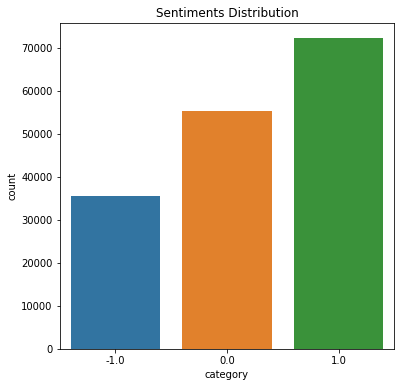

In [9]:
#plot sentiments distribution
plt.figure(figsize=(6,6))
sns.countplot(x='category', data=df)
plt.title('Sentiments Distribution')
plt.show()

In [10]:
#function to create wordcloud
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))

Word Cloud Saved Successfully


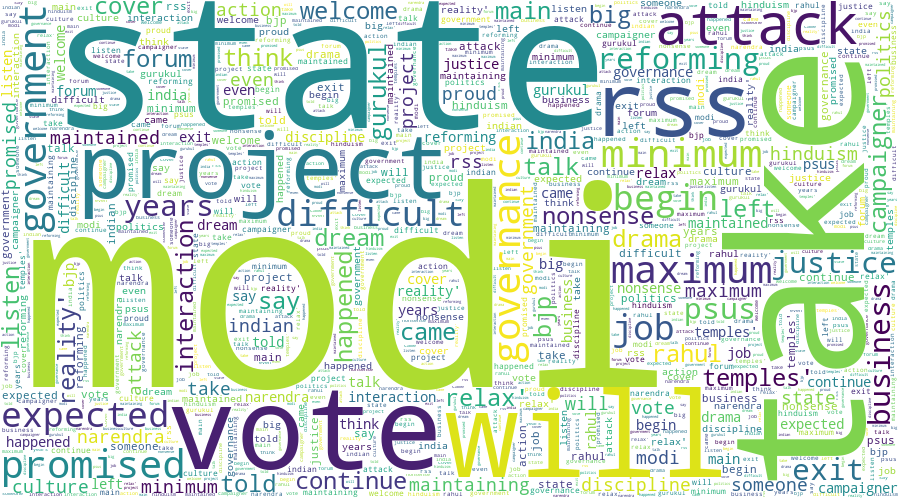

<Figure size 1200x640 with 0 Axes>

In [11]:
#wordcloud for all tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df['clean_text'].values,"all.png")

Word Cloud Saved Successfully


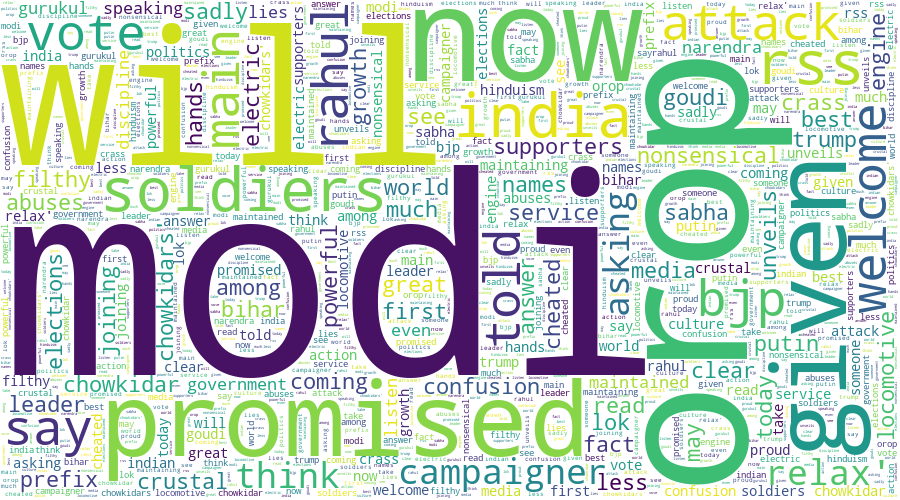

<Figure size 1200x640 with 0 Axes>

In [12]:
#wordcloud for positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_positive['clean_text'].values,"positive.png")

Word Cloud Saved Successfully


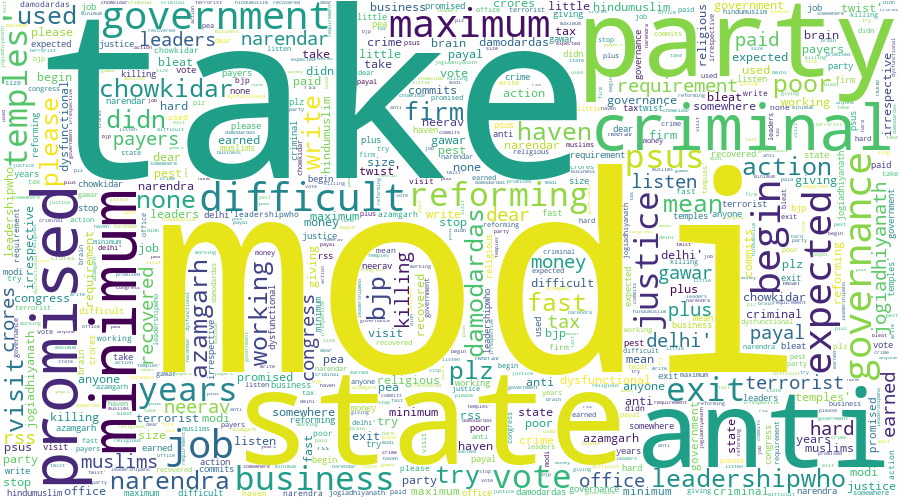

<Figure size 1200x640 with 0 Axes>

In [13]:
#wordcloud for negative tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_negative['clean_text'].values,"negative.png")

Word Cloud Saved Successfully


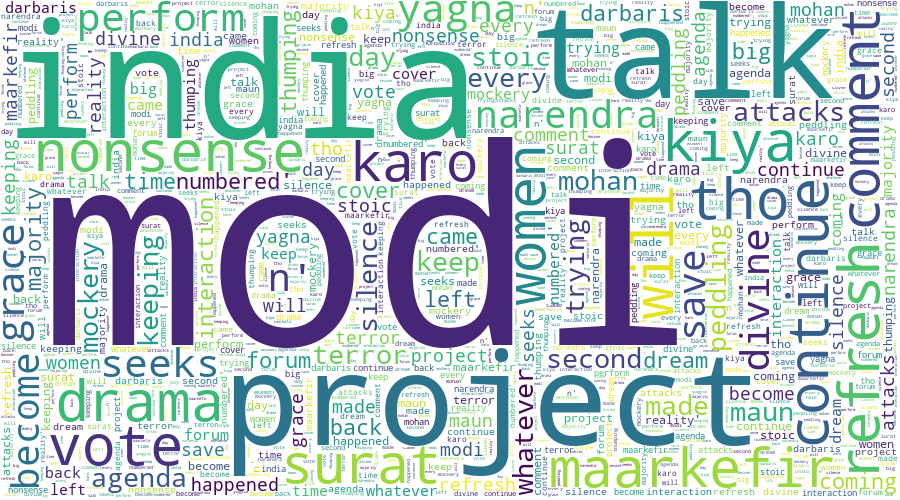

<Figure size 1200x640 with 0 Axes>

In [14]:
#wordcloud for neutral tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_neutral['clean_text'].values,"neutral.png")

### Take Aways: <br>


<li> From all these wordclouds of different classes, It is evident that MODI is the common word used </li>
<li> From positive sentiment wordclouds, WELCOME, SOLDIERS, PROMISED, GIVEN, NOW,VOTE,WILL are the most common words used </li>
<li> From negative sentiment wordclouds, ANTI, CRIMINAL, KILLING, PARTY,STATE are the most common words used </li>
<li> From neutral sentiment wordclouds,INDIA,PROJECT,TALK, are the most common words used </li>


This was just a quick overview. Some words used repeatatively were not noted in the above insights.

 ### Data Preprocessing

In [15]:
# Stemming
ps = PorterStemmer()
# Initializing Lists
corpus = []
words = []
for i in range(0, len(df)):
    # Removing characters other than letters
    review = re.sub('[^a-zA-Z]', ' ', str(df["clean_text"][i]))
    # Lowering the case all the text
    review = review.lower()
    # Splitting into words
    review = review.split()
    # Applying Stemming
    stemmed = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    # Joining words
    review = ' '.join(stemmed)
    # Appending all tweets to a list after preprocessing
    corpus.append(review)
    # Appending all words for word embeddings
    words.append(stemmed)

In [16]:
#sample
corpus[1:10]

['talk nonsens continu drama vote modi',
 'say vote modi welcom bjp told rahul main campaign modi think modi relax',
 'ask support prefix chowkidar name modi great servic confus read crustal clear crass filthi nonsens see abus come chowkidar',
 'answer among power world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat women perform yagna seek divin grace narendra modi becom',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcom elect india saga go import pair look current modi lead govt elect deal brexit combin weekli look juici bear imho',
 'gandhi gay modi']

In [17]:
#length 
print("Legth of Corpus:",len(corpus))

Legth of Corpus: 162980


In [18]:
#update created corpus in our dataframe
df["clean_text"] = corpus

In [19]:
#drop NA Values and reset index, as promised 😆
df = df.dropna()
df = df.reset_index()

In [20]:
#export stemmed sentences
df[["clean_text","category"]].to_csv("stemmed.csv",index = False)

In [ ]:
#load the stemmed sentences
df_stemmed = pd.read_csv("stemmed.csv")
#extract corpus
corpus = list(df_stemmed["clean_text"])

### Representing Text in Numeric Form
Transform text into a meaningful representation of numbers using TF-IDF Vectorizer. Machine learning does not work with text data, it requires numeric data as input into machine algorithms to be able to make predictions thus we have to vectorize our tweets text.

The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification. TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

TF  = (Frequency of a word in the document)/(Total words in the document)

IDF = Log((Total number of docs)/(Number of docs containing the word))

In [23]:
#apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
X_tfidf = tfidf.fit_transform(df["clean_text"]).toarray()

In the code above, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

In [24]:
#dependent varible
Y=df_stemmed["category"]

In [25]:
df_tfidf = pd.DataFrame(X_tfidf,columns = tfidf.get_feature_names())
df_tfidf["output"] = Y
df_tfidf.head()

,aadhar,aaj,aap,aayog,abdullah,abhi,abhinandan,abil,abki,abl,...,yojna,youll,young,youngster,your,youth,youtub,yr,zero,output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Model Building

In [26]:
#split the data into training and testing
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(X_tfidf,Y,test_size=0.33,random_state = 27)

In [27]:
#initialize the model
logistic_tfidf = LogisticRegression(solver='liblinear')
#fit the data/ train the model
logistic_tfidf.fit(X_train_tfidf,Y_train_tfidf)
#make predictions on test data
Y_pred_logistic_tfidf = logistic_tfidf.predict(X_test_tfidf)

### Model Performance Evaluation

In [28]:
acc_log_tfidf = accuracy_score(Y_test_tfidf,Y_pred_logistic_tfidf)
classification_log_tfidf = classification_report(Y_test_tfidf,Y_pred_logistic_tfidf)

#### Confusion Matrix
Let us plot a confusion matrix for our model

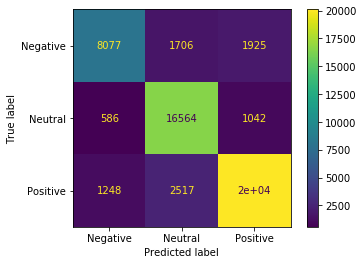

In [29]:
plot_confusion_matrix(logistic_tfidf, 
                      X_test_tfidf, 
                      Y_test_tfidf, 
                      display_labels=["Negative","Neutral","Positive"])

It can be seen that the model classified 11708 (8077+1706+1925) tweets as negative. Out of those 11708, 8077 were correctly classified. 18192 tweets were classified as neural and 16564 were correctly claasified. Finally, 23882 tweets were classified as positive. For those classified as positive, 20117 were correctly classified.

#### Classification Report

In [30]:
print("Classification report \n",classification_log_tfidf)

Classification report 
               precision    recall  f1-score   support

        -1.0       0.81      0.69      0.75     11708
         0.0       0.80      0.91      0.85     18192
         1.0       0.87      0.84      0.86     23882

    accuracy                           0.83     53782
   macro avg       0.83      0.81      0.82     53782
weighted avg       0.83      0.83      0.83     53782



All in all, the model accuracy is 0.83. Since there was a class imbalance in the dataset, we are not going to use accuracy to evaluate the model. Therefore, we will use F1-Score for each class. The model did a very good job of identifying tweets with a positive sentiment, followed by neutral ones, and negative sentiments came in last place. This is also apparent by just looking at the confusion matrix above the classification report.

### Save the model

In [32]:
with open('model.pickle','wb') as f:
  pickle.dump(logistic_tfidf,f)

### Conclusion

Due to time and computational power constraints, a lot of things that could have been implemented were not. For instance,the lazy predict library could have been used to train different classifiers and then select the best one to use instead of just picking a random classification algorithm. It is worth noting that logistic regression typically does not perform very well on imbalanced data. Hence, an ensemble method like random forest would have been appropriate, but it was going to take a lot longer to train depending on the optimal number of estimators for it. GridSearchCV or RandomizedSearchCV could also have been used for hyperparameter tuning to optimize our model, but this step was not implemented as well. A technique like SMOTE could have been used to balance the dataset, and in the data cleansing step, a lot more could have been done but the goal was to make a minimum viable model and prototype,not to go all out and implement a production grade project.